# Ejercicio 14

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model
%matplotlib inline

# Bootstrapping

Una parte central de cualquier modelo estadístico es poder calcular la incertidumbre asociada a sus parámetros.
En los métodos MCMC las incertidumbres se pueden calcular numéricamente. ¿Pero qué hacer con otros métodos que no son Bayesianos?

Una de las posibilidades es utilizar el bootstrap. El poder de este método es que es aplicable cuando no hay herramientas analíticas
disponibles. Además es muy fácil de implementar. En el bootstrap se toman los datos originales y se toman subconjuntos de manera
aleatoria. Cada uno de estos subconjuntos se procesa bajo el método de interés. De esta manera, para cada subconjunto de datos
hay unos parámetros estimados. Al final se hacen los histogramas de los parámetros obtenidos de los diferentes conjuntos y estos
van a dar una idea de las incertidumbres.

Esto proceso no es necesario con un método como mínimos cuadrados porque para este método
ya hay estimadores para las incertidumbres, de todas formas vamos a utilizarlo para demostrar el uso de bootstraping.

Vamos a volver a los datos de precios de carros.

In [2]:
data = pd.read_csv('Cars93.csv')

Vamos a ajustar el modelo lineal `Price` = $\beta_0$ + $\beta_1\times$ `Horsepower` + $\beta_2\times$ `Turn.circle`

In [3]:
X = data[['Horsepower', 'Turn.circle']]
Y = data['Price'].values.reshape(-1,1)

Ahora vamos a dividir los datos en 2 grupos: `test` y `validation`. Para eso usamos `sklearn.model_selection.train_test_split`

In [4]:
import sklearn.model_selection

In [5]:
X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)

`train` vamos a usarlo para encontrar los $\beta_i$ y `validation` para medir $R^2$. 

In [6]:
linear = sklearn.linear_model.LinearRegression()
linear.fit(X_train, Y_train)
beta0 = linear.intercept_[0]
beta1 = linear.coef_[0][0]
beta2 = linear.coef_[0][0]
r2_train = linear.score(X_train, Y_train)
r2_validation = linear.score(X_validation, Y_validation) 
print('betas:', beta0, beta1, beta2)
print('R2 (train vs. validation)', r2_train, r2_validation)

betas: 15.71998376694156 0.2055738428891635 0.2055738428891635
R2 (train vs. validation) 0.6414232932200681 0.3947936748820635


Esto lo podemos repetir muchas veces

In [7]:
for i in range(10):
    X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)
    linear.fit(X_train, Y_train)
    beta0 = linear.intercept_[0]
    beta1 = linear.coef_[0][0]
    beta2 = linear.coef_[0][0]
    r2_train = linear.score(X_train, Y_train)
    r2_validation = linear.score(X_validation, Y_validation) 
    print('ITERACION ', i)
    print('\t betas:', beta0, beta1, beta2)
    print('\t R2 (train vs. validation)', r2_train, r2_validation)

ITERACION  0
	 betas: 5.718914900083385 0.153321732837566 0.153321732837566
	 R2 (train vs. validation) 0.5144087973295137 0.7587885189542309
ITERACION  1
	 betas: 18.84263598419198 0.14245564423718046 0.14245564423718046
	 R2 (train vs. validation) 0.5243231936901201 0.6753221656543902
ITERACION  2
	 betas: 3.172153384373548 0.15457609892515312 0.15457609892515312
	 R2 (train vs. validation) 0.6264064822716702 0.6185437937479913
ITERACION  3
	 betas: 11.493807942444345 0.19633874615678973 0.19633874615678973
	 R2 (train vs. validation) 0.7612999708536534 0.43807299939929123
ITERACION  4
	 betas: 9.884901382018905 0.15733835966828333 0.15733835966828333
	 R2 (train vs. validation) 0.7561163315140351 0.5366901982399308
ITERACION  5
	 betas: 1.5188713312912903 0.11757709107742807 0.11757709107742807
	 R2 (train vs. validation) 0.6486895480089603 0.5336992047402822
ITERACION  6
	 betas: 4.374032728234493 0.16175668531713466 0.16175668531713466
	 R2 (train vs. validation) 0.665665399396759

Hecho de una manera más sistemática y para tener la posibilidad de preparar gráficas, vamos a hacerlo `5000` veces

In [8]:
n_boot = 5000
beta_0 = np.ones(n_boot)
beta_1 = np.ones(n_boot)
beta_2 = np.ones(n_boot)
r2_train = np.ones(n_boot)
r2_validation = np.ones(n_boot)

linear = sklearn.linear_model.LinearRegression()
for i in range(n_boot):
    X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)
    linear.fit(X_train, Y_train)
    beta_0[i] = linear.intercept_[0]
    beta_1[i] = linear.coef_[0][0]
    beta_2[i] = linear.coef_[0][1]
    r2_train[i] = linear.score(X_train, Y_train)
    r2_validation[i] = linear.score(X_validation, Y_validation) 

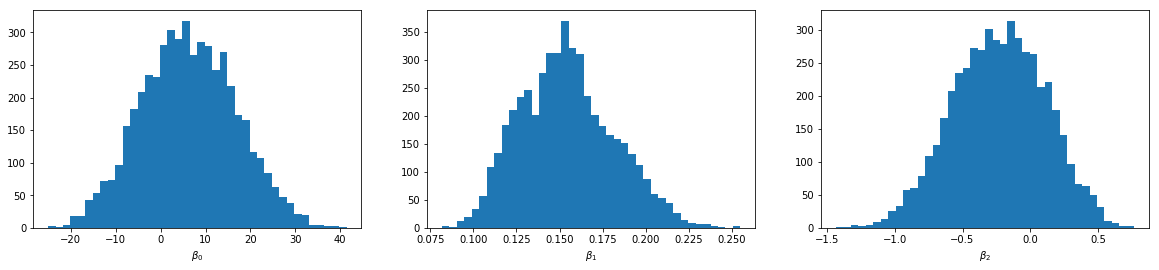

In [9]:
plt.figure(figsize=(20,4))

plt.subplot(131)
_ = plt.hist(beta_0, bins=40)
_ = plt.xlabel(r'$\beta_0$')

plt.subplot(132)
_ = plt.hist(beta_1, bins=40)
_ = plt.xlabel(r'$\beta_1$')

plt.subplot(133)
_ = plt.hist(beta_2, bins=40)
_ = plt.xlabel(r'$\beta_2$')


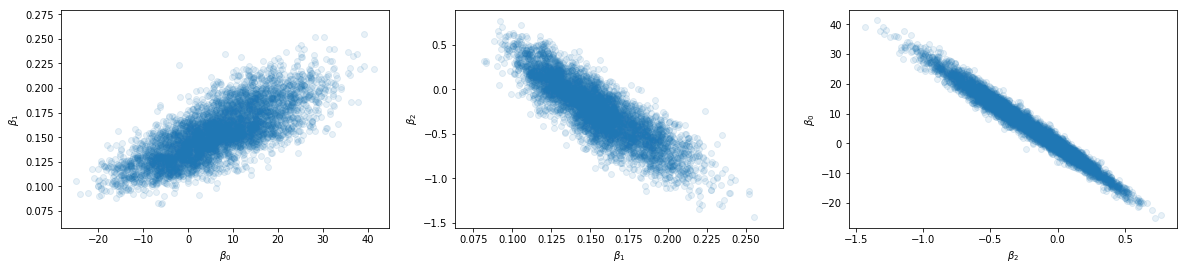

In [10]:
plt.figure(figsize=(20,4))

plt.subplot(131)
plt.scatter(beta_0, beta_1, alpha=0.1)
_ = plt.xlabel(r'$\beta_0$')
_ = plt.ylabel(r'$\beta_1$')

plt.subplot(132)
plt.scatter(beta_1, beta_2, alpha=0.1)
_ = plt.xlabel(r'$\beta_1$')
_ = plt.ylabel(r'$\beta_2$')

plt.subplot(133)
plt.scatter(beta_2, beta_0, alpha=0.1)
_ = plt.xlabel(r'$\beta_2$')
_ = plt.ylabel(r'$\beta_0$')

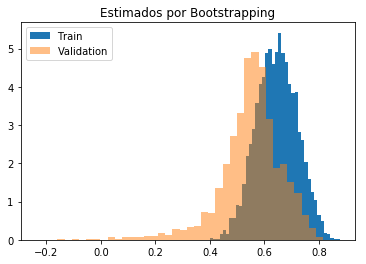

In [11]:
_ = plt.hist(r2_train, bins=40, density=True, label='Train')
_ = plt.hist(r2_validation, bins=40, alpha=0.5, density=True, label='Validation')

plt.title("Estimados por Bootstrapping")
plt.legend()

Y de esta manera podemos estimar los valores medios de los parámetros

In [12]:
print('beta 0 {} +/- {}'.format(beta_0.mean(), beta_0.std() ))
print('beta 1 {} +/- {}'.format(beta_1.mean(), beta_1.std() ))
print('beta 2 {} +/- {}'.format(beta_2.mean(), beta_2.std() ))

beta 0 6.2960927935466255 +/- 10.467635611585235
beta 1 0.154233090783671 +/- 0.027205035981250278
beta 2 -0.23038470540401837 +/- 0.34101397333507505


Y entonces, que diferencias hay entre training, validation and test?

- training: datos para encontrar los parámetros del modelo, dado un método estadístico. En este caso los beta del modelo lineal (modelo) con mínimos cuadrados (método).
- validation: datos para tomar decisiones sobre el método estadístico y, en algunos casos, el modelo mismo. 
- test: datos independientes para medir el rendimiento de un modelo y un método estadístico determinado.

# Ejercicio 7.1

Haga un ejercicio de bootstrap sobre el modelo lineal con variables `Horsepower`, `Turn.circle` y `MPG.highway` para 
estimar los valores medios e incertidumbres. ¿Cuáles de los betas correspondientes son consistentes con cero?

In [13]:
X = data[['Horsepower', 'Turn.circle','MPG.highway']]
Y = data['Price'].values.reshape(-1,1)

In [14]:
n_boot = 5000
beta_0 = np.ones(n_boot)
beta_1 = np.ones(n_boot)
beta_2 = np.ones(n_boot)
beta_3 = np.ones(n_boot)
r2_train = np.ones(n_boot)
r2_validation = np.ones(n_boot)

linear = sklearn.linear_model.LinearRegression()
for i in range(n_boot):
    X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)
    linear.fit(X_train, Y_train)
    beta_0[i] = linear.intercept_[0]
    beta_1[i] = linear.coef_[0][0]
    beta_2[i] = linear.coef_[0][1]
    beta_3[i] = linear.coef_[0][2]
    r2_train[i] = linear.score(X_train, Y_train)
    r2_validation[i] = linear.score(X_validation, Y_validation) 

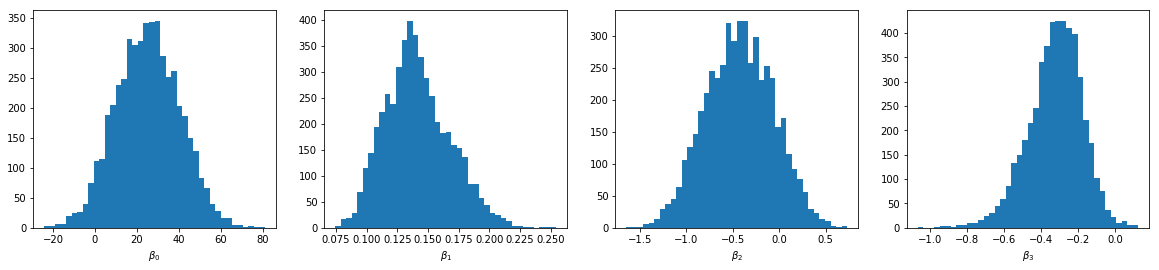

In [15]:
plt.figure(figsize=(20,4))

plt.subplot(141)
_ = plt.hist(beta_0, bins=40)
_ = plt.xlabel(r'$\beta_0$')

plt.subplot(142)
_ = plt.hist(beta_1, bins=40)
_ = plt.xlabel(r'$\beta_1$')

plt.subplot(143)
_ = plt.hist(beta_2, bins=40)
_ = plt.xlabel(r'$\beta_2$')

plt.subplot(144)
_ = plt.hist(beta_3, bins=40)
_ = plt.xlabel(r'$\beta_3$')

De las anteriores gráficas se tiene que los $\beta$ consistentes con cero son:

In [16]:
betas=np.array([beta_0,beta_1,beta_2,beta_3])
for i in range(len(betas)):
    mean=np.mean(betas[i])
    std=np.std(betas[i])
    if np.abs(mean) <= std:
        print('beta_{}'.format(i))

Como no nos arrojó nada el codigo anterior, quiere decir que no se puede ignorar ningun beta

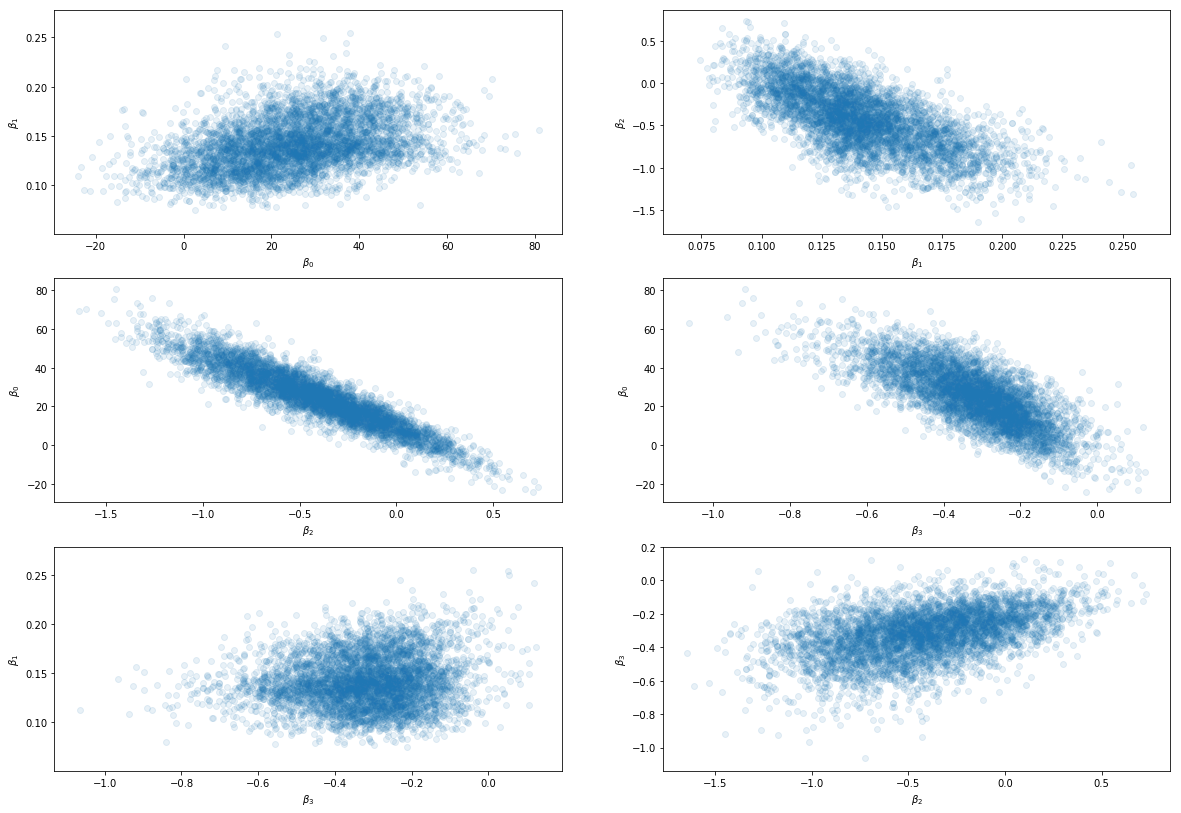

In [17]:
plt.figure(figsize=(20,14))

plt.subplot(321)
plt.scatter(beta_0, beta_1, alpha=0.1)
_ = plt.xlabel(r'$\beta_0$')
_ = plt.ylabel(r'$\beta_1$')

plt.subplot(322)
plt.scatter(beta_1, beta_2, alpha=0.1)
_ = plt.xlabel(r'$\beta_1$')
_ = plt.ylabel(r'$\beta_2$')

plt.subplot(323)
plt.scatter(beta_2, beta_0, alpha=0.1)
_ = plt.xlabel(r'$\beta_2$')
_ = plt.ylabel(r'$\beta_0$')
plt.subplot(324)
plt.scatter(beta_3, beta_0, alpha=0.1)
_ = plt.xlabel(r'$\beta_3$')
_ = plt.ylabel(r'$\beta_0$')
plt.subplot(325)
plt.scatter(beta_3, beta_1, alpha=0.1)
_ = plt.xlabel(r'$\beta_3$')
_ = plt.ylabel(r'$\beta_1$')
plt.subplot(326)
plt.scatter(beta_2, beta_3, alpha=0.1)
_ = plt.xlabel(r'$\beta_2$')
_ = plt.ylabel(r'$\beta_3$')

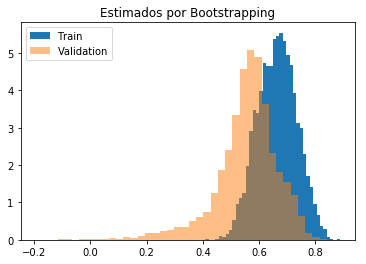

In [18]:
_ = plt.hist(r2_train, bins=40, density=True, label='Train')
_ = plt.hist(r2_validation, bins=40, alpha=0.5, density=True, label='Validation')

plt.title("Estimados por Bootstrapping")
plt.legend()

In [19]:
print('beta 0 {} +/- {}'.format(beta_0.mean(), beta_0.std() ))
print('beta 1 {} +/- {}'.format(beta_1.mean(), beta_1.std() ))
print('beta 2 {} +/- {}'.format(beta_2.mean(), beta_2.std() ))
print('beta 3 {} +/- {}'.format(beta_3.mean(), beta_3.std() ))

beta 0 25.10495861682009 +/- 15.100611026743296
beta 1 0.14158046912790795 +/- 0.02644163237249153
beta 2 -0.42537989457969305 +/- 0.36509943659631355
beta 3 -0.322887784577477 +/- 0.14609314083016672


# Ejercicio 7.2

Para el mismo modelo lineal con variables `Horsepower`, `Turn.circle` y `MPG.highway` utilice MCMC para encontrar P(beta|datos).
¿Cómo se relacionan las distribuciones de los beta encontrados con bootstraping y con MCMC? 
¿Cómo se relacionan los valores medios y las incertidumbres?

In [25]:
def model(x_datos,param):
    y=np.ones(len(x_datos))
    y*=param[0]
    for i in range(len(param)-1):
        y+=param[1]*x_datos[:,i]
    return y

def loglikelihood(x_obs_1,x_obs_2,x_obs_3, y_obs, y_sigma_obs, params):
    y_model = model(x_obs_1,x_obs_2,x_obs_3, params)
    d = -0.5 * ((y_model - y_obs)/y_sigma_obs)**2
    norm = np.sqrt(2.0 * np.pi * y_sigma_obs **2)
    return np.sum(d - (len(x_obs)/2.0)*np.log(norm))
def logprior(param):
    """Logaritmo natural de los prior para los parametros.
        Todos corresponden a gaussianas con sigma=10.0.
    """
    d = -0.5 * np.sum(param**2/(10.0)**2)
    return d

In [ ]:
X_1 = data[['Horsepower', 'Turn.circle','MPG.highway']]
Y_1 = data['Price']

In [27]:
N = 50000
#print(np.array(X_1['Horsepower']))
horse=np.array(X_1['Horsepower'])
turn=np.array(X_1['Turn.circle'])
MPG=np.array(X_1['MPG.highway'])
Price=np.array(Y_1)
print
sigma_y_obs = [np.std(Price), np.std(horse), np.std(turn),np.std(MPG)]
l_param = [np.random.random(4)]
sigma_param=[beta_0.std(),beta_1.std(),beta_2.std(),beta_3.std()]
n_param = len(sigma_param)

NameError: name 'X_1' is not defined

# Ejercicio 7.3

Construya un modelo lineal del precio como funcion de las siguientes variables.

```
k=['MPG.city', 'MPG.highway', 'EngineSize', 
   'Horsepower', 'RPM', 'Rev.per.mile',
   'Fuel.tank.capacity', 'Passengers', 'Length',
   'Wheelbase', 'Width', 'Turn.circle', 'Weight']
```

¿Cuáles son las beta correspondientes **no** son consistentes con ser cero? ¿Cuál es el modelo lineal que queda luego de descartar
estas variables sin importancia?

In [20]:
X_new = data[['MPG.city', 'MPG.highway', 'EngineSize','Horsepower', 'RPM', 'Rev.per.mile','Fuel.tank.capacity', 
          'Passengers', 'Length','Wheelbase', 'Width', 'Turn.circle', 'Weight']]
Y_new = data['Price'].values.reshape(-1,1)

In [21]:
n_boot = 5000
betas=[np.ones(n_boot)]
for i in range(13):
    betas.append(np.ones(n_boot))

betas = np.array(betas)
r2_train = np.ones(n_boot)
r2_validation = np.ones(n_boot)

linear = sklearn.linear_model.LinearRegression()
for i in range(n_boot):
    X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X_new, Y_new, test_size=0.5)
    linear.fit(X_train, Y_train)
    
    for j in range(len(betas)-1):
        if j!=0:
            betas[j][i]=linear.coef_[0][j]
        else:
            betas[0][j] = linear.intercept_[0]
            betas[j][i]=linear.coef_[0][j]
    r2_train[i] = linear.score(X_train, Y_train)
    r2_validation[i] = linear.score(X_validation, Y_validation) 

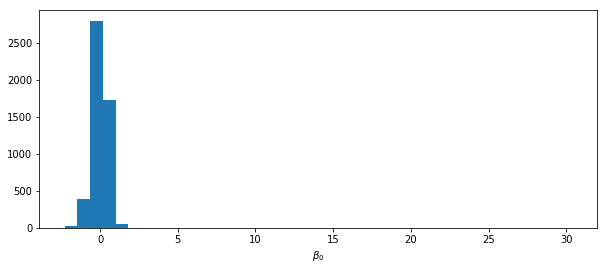

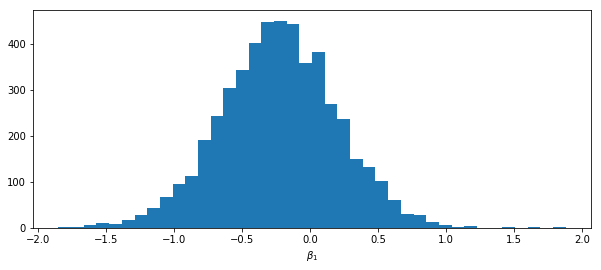

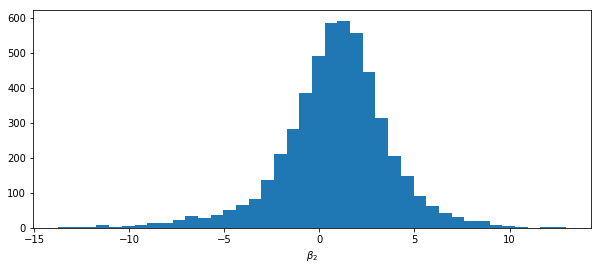

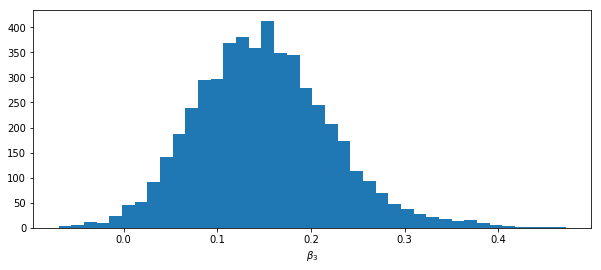

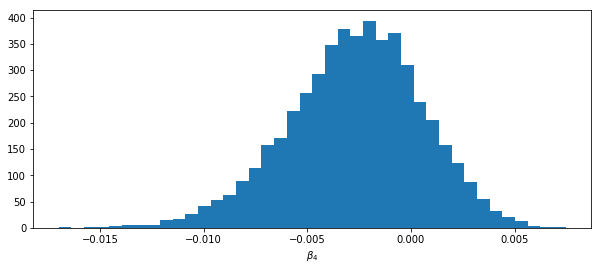

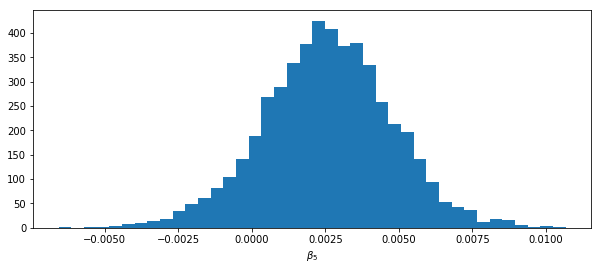

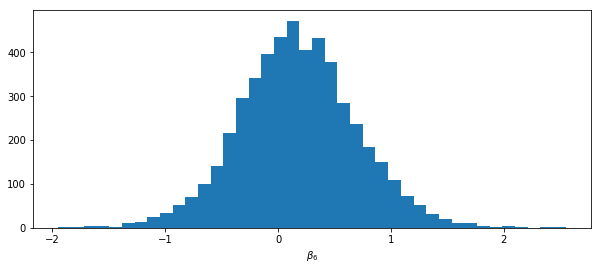

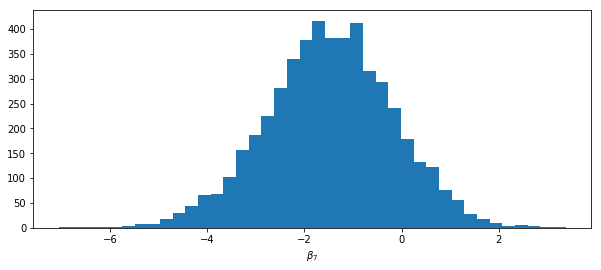

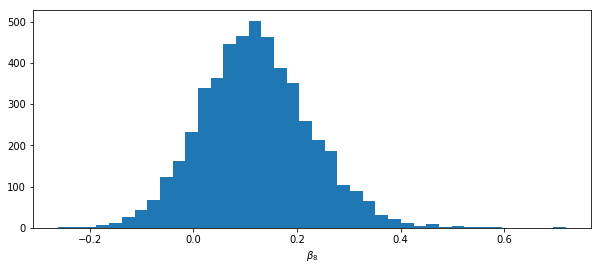

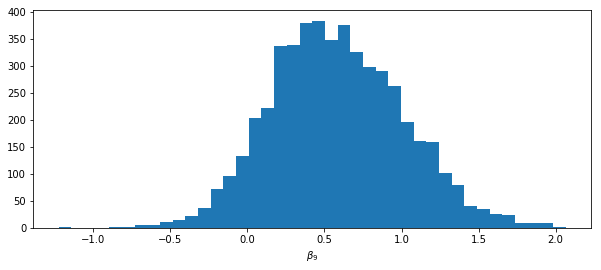

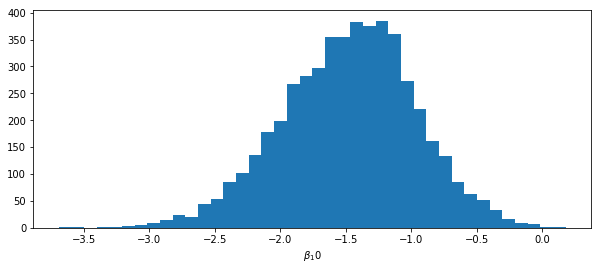

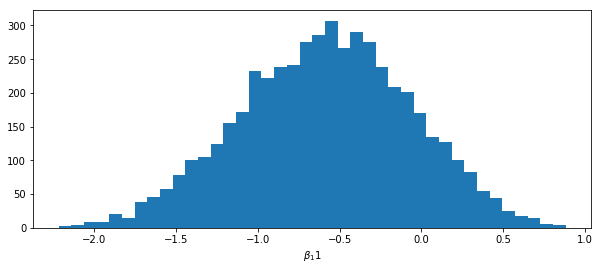

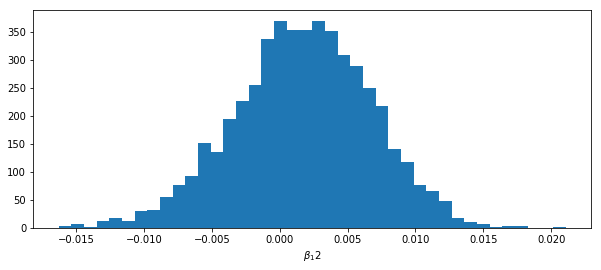

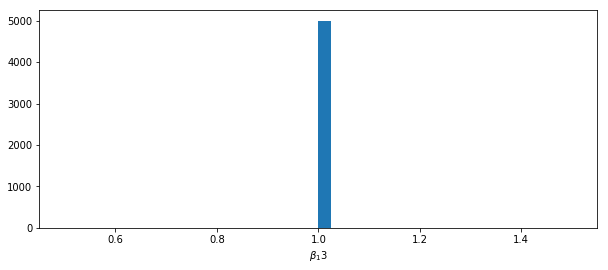

In [22]:
for i in range(len(betas)):
    plt.figure(figsize=(10,4))
    _ = plt.hist(betas[i], bins=40)
    _ = plt.xlabel(r'$\beta_{}$'.format(i))
    plt.show()

Como son tantas gráficas se tiene que si se evalua la condición $|\mu|\leq \sigma^2$ se sabe si $0$ está cercano al promedio y por ende sabremos si se puede ignorar o no este parámetro.

In [23]:
for i in range(len(betas)):
    mean=np.mean(betas[i])
    std=np.std(betas[i])
    if np.abs(mean) <= std:
        print('beta_{}'.format(i))

beta_0
beta_1
beta_2
beta_4
beta_6
beta_12


Con esto tenemos que estos son los parámetros que podemos hacer cero.